In [1]:
# Importar bibliotecas basicas
import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Cargar el dataset
fashion_mnist = keras.datasets.fashion_mnist

In [13]:
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

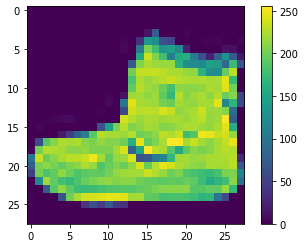

In [11]:
# Explorar datos 
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [16]:
train_images = train_images / 255.0

In [17]:
test_images = test_images / 255.0

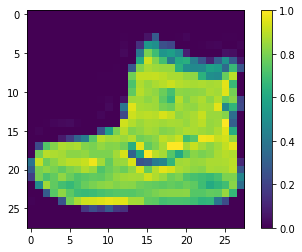

In [20]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.show()

In [14]:
train_labels[0]

9

In [15]:
class_names = ['T-Shirst/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Boot']

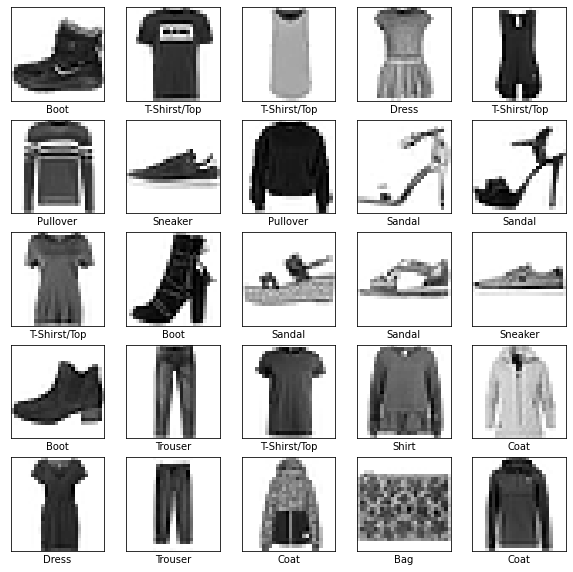

In [19]:
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [21]:
train_images.shape

(60000, 28, 28)

In [30]:
# Creamos el modelo

from keras.layers import Dense, Flatten

model = keras.Sequential()

model.add(Flatten(input_shape=(28,28)))
model.add(Dense(512, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
# Entrenar modelo

model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 31s 16ms/step - loss: 0.4738 - accuracy: 0.8310
Epoch 2/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.3578 - accuracy: 0.8683
Epoch 3/10
1875/1875 [==============================] - 24s 13ms/step - loss: 0.3221 - accuracy: 0.88181s - loss: 0
Epoch 4/10
1875/1875 [==============================] - 25s 13ms/step - loss: 0.2974 - accuracy: 0.8884
Epoch 5/10
1875/1875 [==============================] - 30s 16ms/step - loss: 0.2773 - accuracy: 0.8974
Epoch 6/10
1875/1875 [==============================] - 28s 15ms/step - loss: 0.2647 - accuracy: 0.9003 ETA: 1s - l - ETA: 0s - loss: 0.264
Epoch 7/10
1875/1875 [==============================] - 29s 16ms/step - loss: 0.2523 - accuracy: 0.9043
Epoch 8/10
1875/1875 [==============================] - 31s 17ms/step - loss: 0.2426 - accuracy: 0.9105
Epoch 9/10
1875/1875 [==============================] - 35s 18ms/step - loss: 0.2319 - accuracy: 0.9128
Epoch 10/10
1875

In [33]:
# Evaluamos

test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)

313/313 - 2s - loss: 0.3235 - accuracy: 0.8895 - 2s/epoch - 6ms/step


In [34]:
predictions = model.predict(test_images)

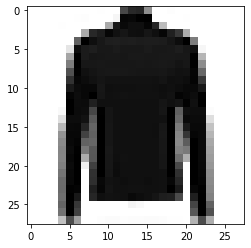

In [49]:
plt.figure()
plt.imshow(test_images[255], cmap=plt.cm.binary)
plt.show()

In [50]:
predictions[255]

array([2.9279058e-06, 7.5000345e-10, 4.6397629e-01, 1.0948481e-07,
       5.1205862e-01, 2.3976547e-09, 2.3962013e-02, 1.4176643e-13,
       1.9008912e-09, 4.1961532e-09], dtype=float32)

<BarContainer object of 10 artists>

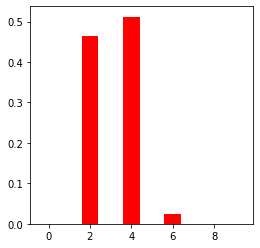

In [51]:
plt.figure(figsize=(4,4))
plt.bar(range(10), predictions[255], color='#ff0000')

In [52]:
class_names[4], class_names[2]

('Coat', 'Pullover')

In [54]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_5 (Dense)             (None, 512)               401920    
                                                                 
 dense_6 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [53]:
# Guardar el modelo

model.save('fashion_mnist_model')

INFO:tensorflow:Assets written to: fashion_mnist_model\assets


In [ ]:
# Guardar pesos del modelo

model.save('fashion_mnist')